In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, precision_score, accuracy_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_train_path = '/content/drive/MyDrive/Colab Notebooks/Wprowadzenie do AI/praca domowa 2/space_titanic_train.csv'
file_test_path = '/content/drive/MyDrive/Colab Notebooks/Wprowadzenie do AI/praca domowa 2/space_titanic_test.csv'

df_train = pd.read_csv(file_train_path)
df_test = pd.read_csv(file_test_path)

### Data exploration

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# I've decided to combine the values of the luxury amenities in one column
df_train["Facilities"] = df_train["RoomService"] + df_train["FoodCourt"] + df_train["ShoppingMall"] + df_train["Spa"] + df_train["VRDeck"];

In [8]:
### TEST DATASET

df_test["Facilities"] = df_test["RoomService"] + df_test["FoodCourt"] + df_test["ShoppingMall"] + df_test["Spa"] + df_test["VRDeck"];

In [9]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Facilities
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [10]:
print(df_train[['Age', 'Transported']].groupby(['Age'], as_index=True).mean().sort_values(by='Transported', ascending=False))
print(df_train[['VIP', 'Transported']].groupby(['VIP'], as_index=True).mean().sort_values(by='Transported', ascending=False))
print(df_train[['CryoSleep', 'Transported']].groupby(['CryoSleep'], as_index=True).mean().sort_values(by='Transported', ascending=False))
print(df_train[['Destination', 'Transported']].groupby(['Destination'], as_index=True).mean().sort_values(by='Transported', ascending=False))
print(df_train[['Facilities', 'Transported']].groupby(['Facilities'], as_index=True).mean().sort_values(by='Transported', ascending=False))

      Transported
Age              
0.0      0.808989
3.0      0.786667
59.0     0.771429
4.0      0.746479
1.0      0.731343
...           ...
78.0     0.333333
65.0     0.304348
69.0     0.166667
73.0     0.142857
79.0     0.000000

[80 rows x 1 columns]
       Transported
VIP               
False     0.506332
True      0.381910
           Transported
CryoSleep             
True          0.817583
False         0.328921
               Transported
Destination               
55 Cancri e       0.610000
PSO J318.5-22     0.503769
TRAPPIST-1e       0.471175
            Transported
Facilities             
2395.0              1.0
2822.0              1.0
937.0               1.0
2712.0              1.0
2727.0              1.0
...                 ...
2743.0              0.0
2742.0              0.0
2739.0              0.0
2738.0              0.0
35987.0             0.0

[2116 rows x 1 columns]


Print histogram for some of the values used above

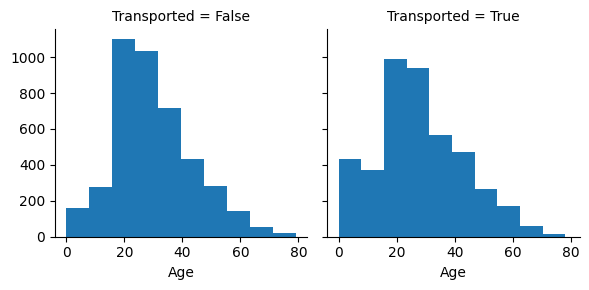

In [11]:
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'Age', bins=10)

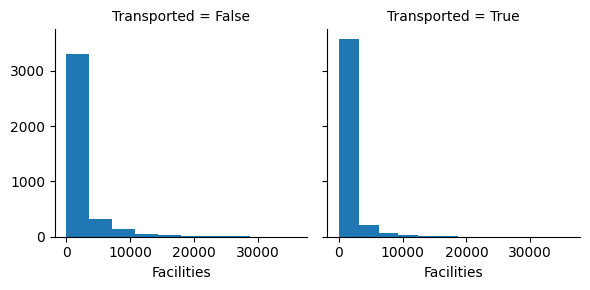

In [12]:
g = sns.FacetGrid(df_train, col='Transported')
g.map(plt.hist, 'Facilities', bins=10)

### Pick X and y

In [13]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Facilities
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


In [14]:
y = df_train["Transported"].copy()
X = df_train.drop(["Transported", "Name", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "PassengerId", "Cabin"], axis=1).copy()

In [15]:
### TEST DATASET - adjust test dataset to have the same shape etc like train dataset

X_df_test = df_test.drop(["Name", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "PassengerId", "Cabin"], axis=1).copy()

### Filling Missig Values

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   VIP          8490 non-null   object 
 5   Facilities   7785 non-null   float64
dtypes: float64(2), object(4)
memory usage: 407.6+ KB


In [17]:
df_train.isna().sum() # check how many NA values is in df_train

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Facilities      908
dtype: int64

In [18]:
# use different startegy for columns with different value types; for numerical ones "mean", for categorical, so string values use "most_frequent"

num_cols = ['Age', 'CryoSleep', 'VIP', 'Facilities']
cat_cols = ['HomePlanet', 'Destination']

for col in num_cols:
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    X[[col]] = imputer.fit_transform(X[[col]])

for col in cat_cols:
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    X[[col]] = imputer.fit_transform(X[[col]])

In [19]:
### TEST DATASET

num_cols = ['Age', 'CryoSleep', 'VIP', 'Facilities']
cat_cols = ['HomePlanet', 'Destination']

for col in num_cols:
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    X_df_test[[col]] = imputer.fit_transform(X_df_test[[col]])

for col in cat_cols:
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    X_df_test[[col]] = imputer.fit_transform(X_df_test[[col]])


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   object 
 1   CryoSleep    8693 non-null   float64
 2   Destination  8693 non-null   object 
 3   Age          8693 non-null   float64
 4   VIP          8693 non-null   float64
 5   Facilities   8693 non-null   float64
dtypes: float64(4), object(2)
memory usage: 407.6+ KB


### Encode


In [21]:
enc = OneHotEncoder()

In [22]:
enc.fit(X[["HomePlanet"]])
homePlanet_df = pd.DataFrame(enc.transform(X[["HomePlanet"]]).toarray(),columns = enc.get_feature_names_out(["HomePlanet"]))
homePlanet_df

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
8688,0.0,1.0,0.0
8689,1.0,0.0,0.0
8690,1.0,0.0,0.0
8691,0.0,1.0,0.0


In [23]:
### TEST DATASET

enc.fit(X_df_test[["HomePlanet"]])
homePlanet_df_test = pd.DataFrame(enc.transform(X_df_test[["HomePlanet"]]).toarray(),columns = enc.get_feature_names_out(["HomePlanet"]))
homePlanet_df_test

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
4272,1.0,0.0,0.0
4273,1.0,0.0,0.0
4274,0.0,0.0,1.0
4275,0.0,1.0,0.0


In [24]:
enc.fit(X[["Destination"]])
destination_df = pd.DataFrame(enc.transform(X[["Destination"]]).toarray(), columns = enc.get_feature_names_out(["Destination"]))
destination_df

,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
8688,1.0,0.0,0.0
8689,0.0,1.0,0.0
8690,0.0,0.0,1.0
8691,1.0,0.0,0.0


In [25]:
### TEST DATASET

enc.fit(X_df_test[["Destination"]])
destination_df_test = pd.DataFrame(enc.transform(X_df_test[["Destination"]]).toarray(), columns = enc.get_feature_names_out(["Destination"]))
destination_df_test

,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
4272,0.0,0.0,1.0
4273,0.0,0.0,1.0
4274,1.0,0.0,0.0
4275,0.0,0.0,1.0


In [26]:
# I've dicded to drop the Cabin from both datasets after running the code below
# for easier calutations, as in prediction part the Cabin values of test and train datasets are different
# and the code throws errors.


# enc.fit(X[["Cabin"]])
# cabin_df = pd.DataFrame(enc.transform(X[["Cabin"]]).toarray(),columns = enc.get_feature_names_out(["Cabin"]))
# cabin_df

In [27]:
# ### TEST DATASET

# enc.fit(X_df_test[["Cabin"]])
# cabin_df_test = pd.DataFrame(enc.transform(X_df_test[["Cabin"]]).toarray(),columns = enc.get_feature_names_out(["Cabin"]))
# cabin_df_test

### Scale

In [28]:
mm_age = MinMaxScaler()
age_minmax = mm_age.fit_transform(X[["Age"]])
X["Age"] = age_minmax

In [29]:
### TEST DATASET

mm_age_df_test = MinMaxScaler()
age_minmax_df_test = mm_age_df_test.fit_transform(X_df_test[["Age"]])
X_df_test["Age"] = age_minmax_df_test

In [30]:
mm_facilities = MinMaxScaler()
facilities_minmax = mm_facilities.fit_transform(X[["Facilities"]])
X["Facilities"] = facilities_minmax

In [31]:
### TEST DATASET

mm_facilities_df_test = MinMaxScaler()
facilities_minmax_df_test = mm_facilities_df_test.fit_transform(X_df_test[["Facilities"]])
X_df_test["Facilities"] = facilities_minmax_df_test

### Combine data

In [32]:
X_transformed = X.copy()
X_transformed = X_transformed.drop(["HomePlanet", "Destination"], axis=1)
X_transformed = pd.concat([X_transformed, homePlanet_df, destination_df], axis=1)
X_transformed.head()

,CryoSleep,Age,VIP,Facilities,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.493671,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.303797,0.0,0.020452,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.288521,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.417722,0.0,0.143830,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.202532,0.0,0.030317,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
### TEST DATASET

X_df_test_transformed = X_df_test.copy()
X_df_test_transformed = X_df_test_transformed.drop(["HomePlanet", "Destination"], axis=1)
X_df_test_transformed = pd.concat([X_df_test_transformed, homePlanet_df_test, destination_df_test], axis=1)
X_df_test_transformed.head()

,CryoSleep,Age,VIP,Facilities,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1.0,0.341772,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.240506,0.0,0.084120,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.392405,0.0,0.000000,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.481013,0.0,0.220341,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.253165,0.0,0.019159,1.0,0.0,0.0,0.0,0.0,1.0


### TRAIN/TEST && Logistic Regression

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

In [35]:
# Fit, predict and evaluate Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_prop = clf.predict_proba(X_test)

In [36]:
y_pred_prop[0], y_pred[0]

(array([0.6581459, 0.3418541]), False)

In [37]:
clf.score(X_test, y_test)

0.7154907975460123

In [38]:
clf.coef_[0]

array([ 1.98515384, -0.79224361, -0.40942668, -3.66524689, -0.56284589,
        0.76481815, -0.16184507,  0.22695485, -0.11364511, -0.07318255])

In [39]:
### TEST DATASET
y_pred_df_test = clf.predict(X_df_test_transformed)
y_pred_prop_df_test = clf.predict_proba(X_df_test_transformed)

print("y_pred_prop_df_test[0], y_pred_df_test[0]", y_pred_prop_df_test[0], y_pred_df_test[0])

y_pred_prop_df_test[0], y_pred_df_test[0] [0.24984629 0.75015371] True


### Measures

In [40]:
confusion_matrix(y_test, y_pred)

array([[1005,  284],
       [ 458,  861]])

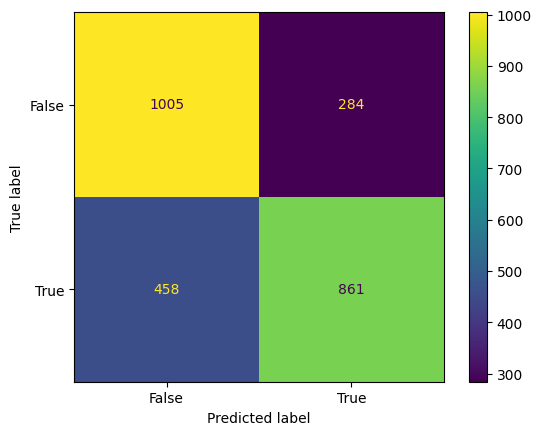

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=clf.classes_)
disp.plot()
plt.show()

In [42]:
print("Recall score: ", recall_score(y_test, y_pred))
print("Precision score: ", precision_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))

Recall score:  0.6527672479150872
Precision score:  0.7519650655021834
F1 score:  0.6988636363636365


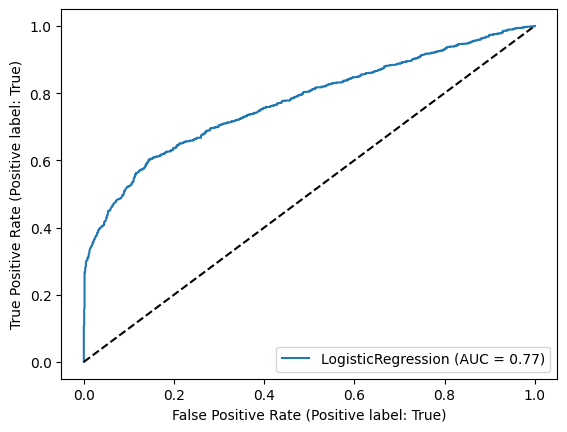

In [43]:
svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.show()

### KFold cross validation && Grid Search

In [44]:
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

array([0.69293924, 0.70771757, 0.73399015, 0.71756979, 0.71428571,
       0.72368421, 0.71381579, 0.69078947, 0.72861842, 0.74177632])

In [45]:
grid = {"C": [0.1, 1, 5, 10], "penalty": ["l2"], "class_weight": ['balanced', None]}
logreg = LogisticRegression(max_iter=1000) # increased max iterations limit as otherwise there is an error of exceeded iterations limit
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hpyerparameters: (best parameters) ", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)

tuned hpyerparameters: (best parameters)  {'C': 5, 'class_weight': 'balanced', 'penalty': 'l2'}
accuracy: 0.7179975801572899


In [46]:
### Run the LogisticRegression again with the best parameters

clf_1 = LogisticRegression(random_state=0, C=5, class_weight='balanced', penalty='l2').fit(X_train, y_train)
y_pred_1 = clf_1.predict(X_test)

y_pred_prop_1 = clf_1.predict_proba(X_test)

print("Comparison of: y_pred_prop, y_pred", y_pred_prop[0], y_pred[0], " AND y_pred_prop_1, y_pred_1", y_pred_prop_1[0], y_pred_1[0])
print("Comparison of: clf.score", clf.score(X_test, y_test), " AND clf_1.score:", clf_1.score(X_test, y_test))
print("Comparison of: clf_1.coef_", clf_1.coef_[0], " AND clf.coef_", clf.coef_[0])

Comparison of: y_pred_prop, y_pred [0.6581459 0.3418541] False  AND y_pred_prop_1, y_pred_1 [0.66496295 0.33503705] False
Comparison of: clf.score 0.7154907975460123  AND clf_1.score: 0.7154907975460123
Comparison of: clf_1.coef_ [ 1.95501796 -0.7918222  -0.41332188 -4.47850464 -0.58743705  0.82061259
 -0.17361978  0.23857702 -0.10865368 -0.07036758]  AND clf.coef_ [ 1.98515384 -0.79224361 -0.40942668 -3.66524689 -0.56284589  0.76481815
 -0.16184507  0.22695485 -0.11364511 -0.07318255]


### Comparison of different models

In [47]:
rfc = RandomForestClassifier(random_state=0).fit(X_train, y_train)
svc = SVC(random_state=0).fit(X_train, y_train)
gnb = GaussianNB().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_gnb = gnb.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)


In [48]:
### TEST DATASET

y_pred_rfc_df_test = rfc.predict(X_df_test_transformed)
y_pred_svc_df_test = svc.predict(X_df_test_transformed)
y_pred_gnb_df_test = gnb.predict(X_df_test_transformed)
y_pred_knn_df_test = knn.predict(X_df_test_transformed)
y_pred_lr_df_test = lr.predict(X_df_test_transformed)

print("y_pred_rfc_df_test", y_pred_rfc_df_test, y_pred_rfc_df_test[0])
print("y_pred_svc_df_test", y_pred_svc_df_test, y_pred_svc_df_test[0])
print("y_pred_gnb_df_test", y_pred_gnb_df_test, y_pred_gnb_df_test[0])
print("y_pred_knn_df_test", y_pred_knn_df_test, y_pred_knn_df_test[0])
print("y_pred_lr_df_test", y_pred_lr_df_test, y_pred_lr_df_test[0])

y_pred_rfc_df_test [ True False  True ...  True  True False] True
y_pred_svc_df_test [ True False  True ...  True False  True] True
y_pred_gnb_df_test [ True False  True ...  True  True  True] True
y_pred_knn_df_test [False False  True ...  True  True False] False
y_pred_lr_df_test [ True False  True ...  True  True  True] True


In [49]:
print("RandomForestClassifier")
print("Recall score: ", recall_score(y_test, y_pred_rfc))
print("Precision score: ", precision_score(y_test, y_pred_rfc))
print("F1 score: ", f1_score(y_test, y_pred_rfc))
print("\n")

print("SVC")
print("Recall score: ", recall_score(y_test, y_pred_svc))
print("Precision score: ", precision_score(y_test, y_pred_svc))
print("F1 score: ", f1_score(y_test, y_pred_svc))
print("\n")

print("GaussianNB")
print("Recall score: ", recall_score(y_test, y_pred_gnb))
print("Precision score: ", precision_score(y_test, y_pred_gnb))
print("F1 score: ", f1_score(y_test, y_pred_gnb))
print("\n")

print("KNeighborsClassifier")
print("Recall score: ", recall_score(y_test, y_pred_knn))
print("Precision score: ", precision_score(y_test, y_pred_knn))
print("F1 score: ", f1_score(y_test,y_pred_knn))
print("\n")

print("LogisticRegression")
print("Recall score: ", recall_score(y_test, y_pred_lr))
print("Precision score: ", precision_score(y_test, y_pred_lr))
print("F1 score: ", f1_score(y_test, y_pred_lr))
print("\n")

RandomForestClassifier
Recall score:  0.6952236542835482
Precision score:  0.6931216931216931
F1 score:  0.6941710825132476


SVC
Recall score:  0.5943896891584534
Precision score:  0.8099173553719008
F1 score:  0.6856143419326628


GaussianNB
Recall score:  0.7065959059893859
Precision score:  0.7002253944402704
F1 score:  0.7033962264150944


KNeighborsClassifier
Recall score:  0.6664139499620925
Precision score:  0.7032
F1 score:  0.6843129622421176


LogisticRegression
Recall score:  0.6527672479150872
Precision score:  0.7519650655021834
F1 score:  0.6988636363636365




Considering the above:

The most commonly used metric to assess the overall performance of a model is the F1 score, as it is the harmonic mean between recall and precision, which allows the two measures to be balanced. In this case, the best model is the one with the highest F1 score.

**GaussianNB**: F1 score: 0. 7034

The GaussianNB has the highest F1 score (0. 7034) suggesting it is the best model among these. It offers the best balance between recall (0. 7066) and precision (0. 7002), which means it has a good balance between detecting positive examples and avoiding false alarms.

In [50]:
rfc_cv = RandomForestClassifier()
svc_cv = SVC()
gnb_cv = GaussianNB()
knn_cv = KNeighborsClassifier()
logr_cv = LogisticRegression()

models = [rfc_cv, svc_cv, gnb_cv, knn_cv, logr_cv]

In [51]:
for i in models:
  scores = cross_val_score(i, X_train, y_train, cv=10)
  print(i, ": with mean ", scores.mean(), " and std ", scores.std())


RandomForestClassifier() : with mean  0.6915389227378792  and std  0.01395347683914617
SVC() : with mean  0.7189857726212081  and std  0.016026025619806584
GaussianNB() : with mean  0.7005771432892576  and std  0.01987787665309866
KNeighborsClassifier() : with mean  0.6921960072595281  and std  0.015127079859484104
LogisticRegression() : with mean  0.7165186673580503  and std  0.01565179497977246


In [52]:
grid = {
    'max_depth': [5, 8, 10],
    'max_features': ['sqrt', 'log2', None, 5],
    'n_estimators': [100, 200, 500]
}
rfc_grid = RandomForestClassifier()
rfc_grid_cv = GridSearchCV(rfc_grid, grid, cv=10)
rfc_grid_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", rfc_grid_cv.best_params_)
print("accuracy :", rfc_grid_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}
accuracy : 0.7410071514994382


In [53]:
grid = {
    'C': [0.1, 1, 5, 10],
    'degree': [3, 5, 10],
    'class_weight': [ 'balanced', None ]
}

svc_grid = SVC()
svc_grid_cv = GridSearchCV(svc_grid, grid, cv=10)
svc_grid_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", svc_grid_cv.best_params_)
print("accuracy :", svc_grid_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 5, 'class_weight': None, 'degree': 3}
accuracy : 0.7301599904934751


In [54]:
grid = {
    'n_neighbors': [5, 8, 10],
    'weights': ['uniform', 'distance', None],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}
knn_grid = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn_grid, grid, cv=10)
knn_grid_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ", knn_grid_cv.best_params_)
print("accuracy :", knn_grid_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
accuracy : 0.7193147199896293


### Comparison of different models after grid search with best parameters

In [55]:
rfc_1 = RandomForestClassifier(random_state=0, max_depth=5, max_features='log2', n_estimators=500).fit(X_train, y_train)
svc_1 = SVC(random_state=0, C= 5, class_weight=None, degree= 3).fit(X_train, y_train)
gnb_1 = GaussianNB().fit(X_train, y_train)
knn_1 = KNeighborsClassifier(algorithm='auto', n_neighbors=10, p=2, weights='uniform').fit(X_train, y_train)
lr_1 = LogisticRegression(random_state=0, C=5, class_weight='balanced', penalty='l2').fit(X_train, y_train).fit(X_train, y_train)

y_pred_rfc_1 = rfc_1.predict(X_test)
y_pred_svc_1 = svc_1.predict(X_test)
y_pred_gnb_1 = gnb_1.predict(X_test)
y_pred_knn_1 = knn_1.predict(X_test)
y_pred_lr_1 = lr_1.predict(X_test)

y_pred_rfc_1_df_test = rfc_1.predict(X_df_test_transformed)
y_pred_svc_1_df_test = svc_1.predict(X_df_test_transformed)
y_pred_gnb_1_df_test = gnb_1.predict(X_df_test_transformed)
y_pred_knn_1_df_test = knn_1.predict(X_df_test_transformed)
y_pred_lr_1_df_test = lr_1.predict(X_df_test_transformed)

models_1 = [rfc_1, svc_1, gnb_1, knn_1, lr_1]


In [56]:
for i in models_1:
  scores_1 = cross_val_score(i, X_train, y_train, cv=10)
  print(i, ": with mean ", scores_1.mean(), " and std ", scores_1.std())

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=500,
                       random_state=0) : with mean  0.7405137304468068  and std  0.018026359998682226
SVC(C=5, random_state=0) : with mean  0.7301599904934751  and std  0.01580094008578396
GaussianNB() : with mean  0.7005771432892576  and std  0.01987787665309866
KNeighborsClassifier(n_neighbors=10) : with mean  0.7193147199896293  and std  0.015917883693820654
LogisticRegression(C=5, class_weight='balanced', random_state=0) : with mean  0.7179975801572899  and std  0.014911332388007344


In [57]:
print("RandomForestClassifier")
print("Recall score: ", recall_score(y_test, y_pred_rfc_1))
print("Precision score: ", precision_score(y_test, y_pred_rfc_1))
print("F1 score: ", f1_score(y_test, y_pred_rfc_1))
print("\n")

print("SVC")
print("Recall score: ", recall_score(y_test, y_pred_svc_1))
print("Precision score: ", precision_score(y_test, y_pred_svc_1))
print("F1 score: ", f1_score(y_test, y_pred_svc_1))
print("\n")

print("GaussianNB")
print("Recall score: ", recall_score(y_test, y_pred_gnb_1))
print("Precision score: ", precision_score(y_test, y_pred_gnb_1))
print("F1 score: ", f1_score(y_test, y_pred_gnb_1))
print("\n")

print("KNeighborsClassifier")
print("Recall score: ", recall_score(y_test, y_pred_knn_1))
print("Precision score: ", precision_score(y_test, y_pred_knn_1))
print("F1 score: ", f1_score(y_test,y_pred_knn_1))
print("\n")

print("LogisticRegression")
print("Recall score: ", recall_score(y_test, y_pred_lr_1))
print("Precision score: ", precision_score(y_test, y_pred_lr_1))
print("F1 score: ", f1_score(y_test, y_pred_lr_1))

RandomForestClassifier
Recall score:  0.6535253980288097
Precision score:  0.7952029520295203
F1 score:  0.7174365376612568


SVC
Recall score:  0.6239575435936315
Precision score:  0.8060724779627816
F1 score:  0.7034188034188034


GaussianNB
Recall score:  0.7065959059893859
Precision score:  0.7002253944402704
F1 score:  0.7033962264150944


KNeighborsClassifier
Recall score:  0.6269901440485216
Precision score:  0.7714552238805971
F1 score:  0.6917607695524886


LogisticRegression
Recall score:  0.6527672479150872
Precision score:  0.7519650655021834
F1 score:  0.6988636363636365


Now, considaring the above:


**RandomForestClassifier** has the highest F1 score (0. 7174) and the highest average score (0. 7405) with an acceptable standard deviation (0. 0180). This suggests that this model is the best one from listed above for predicting the chances of being transported to another dimension on the space Titanic.